In [1]:
# Importing Pandas and numpy libraries for data manipulation
import numpy as np
import pandas as pd

# Importing matplotlib & seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing train test split for data spliting
from sklearn.model_selection import train_test_split

# Importing libraries for data normalization
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

#Importing packages for model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Importing models for fitting
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import keras 
from sklearn.cluster import KMeans
import tensorflow

In [2]:
#loading dataset
dataset=pd.read_csv("/content/drive/MyDrive/Dataset General/winequalityN.csv")

In [4]:
#Using describe method to view basic statistical details
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339958,0.318722,5.444326,0.056522,30.525319,115.744574,0.994911,3.218395,0.531215,10.491795,5.818378
std,1.296750,0.164988,0.145265,4.758125,0.035127,17.749400,56.521855,0.005036,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.010000,1.000000,6.000000,0.990000,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.040000,17.000000,77.000000,0.990000,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.050000,29.000000,118.000000,0.990000,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.070000,41.000000,156.000000,1.000000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.040000,4.010000,2.000000,14.900000,9.000000


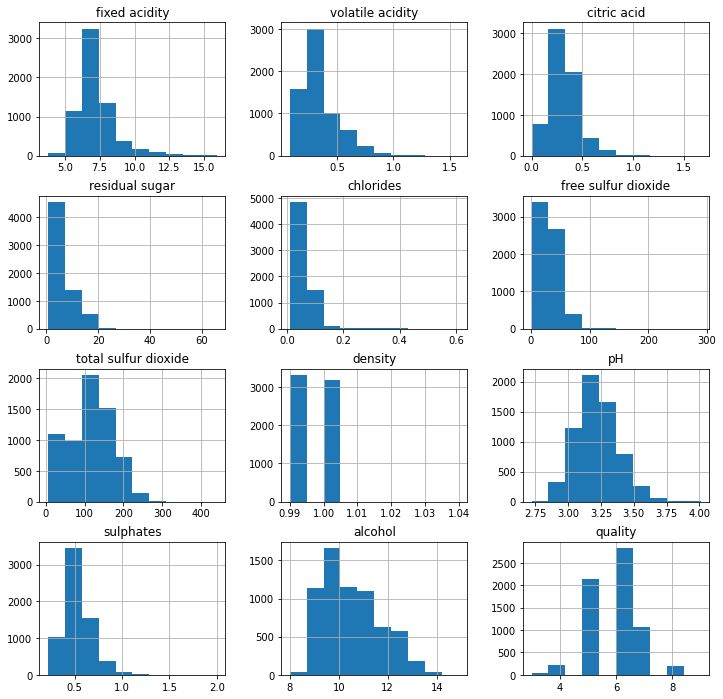

In [5]:
#Visualizing the frequency of values in a metric variable’s intervals
dataset.hist(figsize=[12, 12])
plt.show()

# **Data Preprocessing**

In [6]:
# checks whether any value in the dataset in nan
dataset.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [7]:
#counting nan values
dataset.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
#filling features nan values with mean values of features
dataset = dataset.fillna(dataset.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


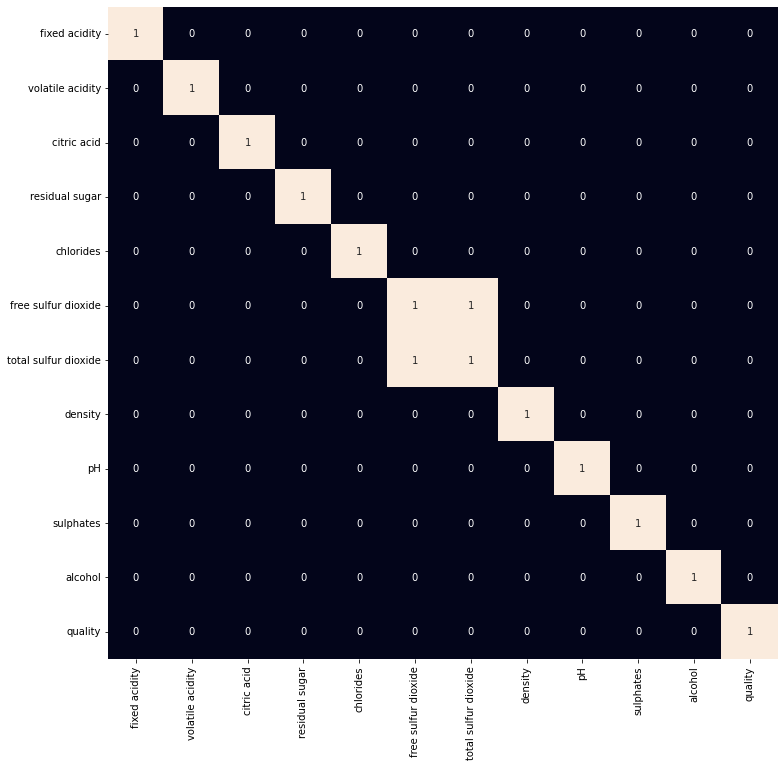

In [9]:
#Visualizing co-relation between features
plt.figure(figsize=(12, 12))
sns.heatmap(dataset.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [10]:
#From the above heat map we can conclude that the ‘total sulphur dioxide’ is highly correlated features so, we will remove them.
df = dataset.drop('total sulfur dioxide', axis=1)

In [11]:
#segregating the quality feature into zeros and ones
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [12]:
#column with categorical data type will replace it with the 0 and 1 as there are only two categories.
df.replace({'white': 1, 'red': 0}, inplace=True)

In [13]:
#Segregating features and the target variable from the dataset 
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

#Splitting data it into 80:20 ratio for model selection.
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

#checking shape of training data and testing data 
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [14]:
#Normalising the data before training help us to achieve stable and fast training of the model.
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

# **Machine Learning Models**

In [15]:
#Using Logistic Regression, XGB Classifier and Support Vector Classifier for model fitting
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))

LogisticRegression() : 
Training Accuracy :  0.700492261279959
Validation Accuracy :  0.694394213381555
XGBClassifier() : 
Training Accuracy :  0.7657674131156054
Validation Accuracy :  0.7287726933725647
SVC() : 
Training Accuracy :  0.7058374494478488
Validation Accuracy :  0.6973008040375558


In [16]:
# From the above accuracies we can say that XGB classifier performing better on the validation data with less difference between the validation and training data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

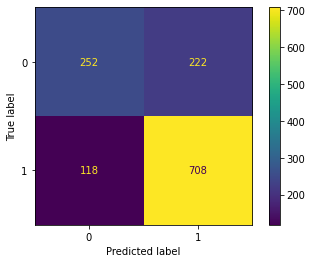

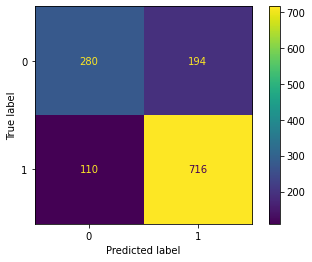

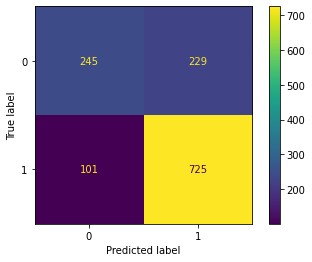

In [17]:
#Plotting the confusion matrix as well for the validation data using the models.
metrics.plot_confusion_matrix(models[0], xtest, ytest)
metrics.plot_confusion_matrix(models[1], xtest, ytest)
metrics.plot_confusion_matrix(models[2], xtest, ytest)
plt.show()

In [18]:
#Printing the classification report for the best performing model XGB Classifier.
print(metrics.classification_report(ytest,models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       474
           1       0.79      0.87      0.82       826

    accuracy                           0.77      1300
   macro avg       0.75      0.73      0.74      1300
weighted avg       0.76      0.77      0.76      1300



# **Elbow Plot in k-means for selecting the Hyperparameters**

In [19]:
#Building the clustering model and calculating the values of the Distortion and Inertia
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
  
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [20]:
#Using the different values of Distortion:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 15.322142506462777
2 : 9.749309971916789
3 : 7.462830174590748
4 : 6.646849862530286
5 : 6.141138474306438
6 : 5.711368607376239
7 : 5.307321469545939
8 : 5.240925786592706
9 : 4.824878156292122


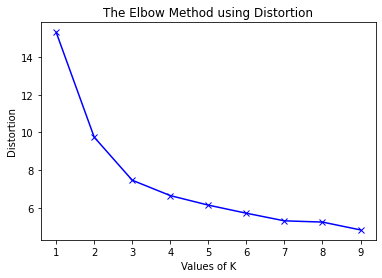

In [21]:
#Plotting the different values of Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [22]:
#Using the different values of Inertia:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 2221979.252431934
2 : 900529.3831688236
3 : 553885.5908079536
4 : 424868.03993167647
5 : 345942.5405200766
6 : 290503.46312444966
7 : 254650.895932574
8 : 222614.084070199
9 : 191796.31029377115


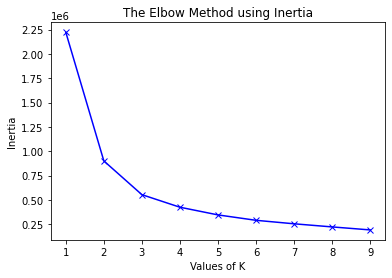

In [23]:
#Plotting the different values of Inertia:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [24]:
#To determine the optimal number of clusters, we have to select the value of k at the “elbow”
#the point after which the distortion/inertia start decreasing in a linear fashion. 
#Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [25]:
#Using k nearest neighbors for model fitting by setting n value by 3
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
score=cross_val_score(knn_classifier,xtrain, ytrain,cv=10)
print('KNN Classifier accuracy:',score.mean())

KNN Classifier accuracy: 0.7479279679857715


# **Deep Learning Model**

In [29]:
# Initializing the constructor
model = keras.models.Sequential()

# Adding an input layer with 11 features as an input
model.add(keras.layers.Dense(48, activation='relu', input_shape=(11,)))

# Add three hidden layers
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
# Adding an output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Summary of model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 48)                576       
                                                                 
 dense_6 (Dense)             (None, 36)                1764      
                                                                 
 dense_7 (Dense)             (None, 24)                888       
                                                                 
 dense_8 (Dense)             (None, 8)                 200       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,437
Trainable params: 3,437
Non-trainable params: 0
_________________________________________________________________


# **Hyperparameter Tuning**

In [30]:
#Using compile function to optimize weight in a way that accuracy make increases by varying input parameters.
tensorflow.keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae','acc'])

In [38]:
#Model fitting using deep learning's sequential model
hist=model.fit(xtrain,ytrain, batch_size=100,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
6/6 [==============================] - 0s 28ms/step - loss: 0.0963 - mse: 0.0963 - mae: 0.1915 - acc: 0.8807 - val_loss: 0.1662 - val_mse: 0.1662 - val_mae: 0.2669 - val_acc: 0.7731
Epoch 2/10
6/6 [==============================] - 0s 26ms/step - loss: 0.0966 - mse: 0.0966 - mae: 0.1944 - acc: 0.8811 - val_loss: 0.1663 - val_mse: 0.1663 - val_mae: 0.2647 - val_acc: 0.7777
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 0.0970 - mse: 0.0970 - mae: 0.1905 - acc: 0.8799 - val_loss: 0.1662 - val_mse: 0.1662 - val_mae: 0.2643 - val_acc: 0.7831
Epoch 4/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0965 - mse: 0.0965 - mae: 0.1938 - acc: 0.8809 - val_loss: 0.1657 - val_mse: 0.1657 - val_mae: 0.2656 - val_acc: 0.7815
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 0.0966 - mse: 0.0966 - mae: 0.1912 - acc: 0.8805 - val_loss: 0.1654 - val_mse: 0.1654 - val_mae: 0.2625 - val_acc: 0.7823
Epoch 6/10
6/6 [===================

In [39]:
#Evaluation sequential model perfomance
score = model.evaluate(xtest, ytest, verbose = 0) 

print('Validation loss:', score[0]) 
print('Validation accuracy:', score[3])

Validation loss: 0.16587793827056885
Validation accuracy: 0.7792307734489441


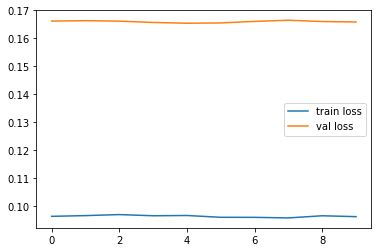

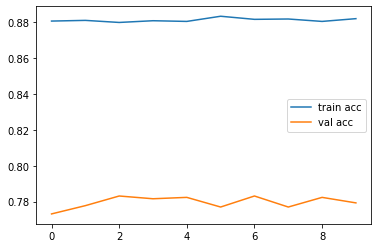

In [40]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(hist.history['acc'], label='train acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.legend()
plt.show()